In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import nltk  
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv(r'C:\spam_ham_dataset.csv')
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
text = data['text']
text

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

In [4]:
print("\n"+'-'*25)
print("shape of data:",data.shape) 
print("\n"+'-'*25)
print("\nno dimensions of data:",data.ndim)
print("\n"+'-'*25)
print("\nsize of data:",data.size)
print("\n"+'-'*25)
print("\nSum fo all null values:\n",data.isnull().sum())
print("\n"+'-'*25)


-------------------------
shape of data: (5171, 4)

-------------------------

no dimensions of data: 2

-------------------------

size of data: 20684

-------------------------

Sum fo all null values:
 Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

-------------------------


In [5]:
print("Column Names : \n"+'-'*25)
print(data.columns)

Column Names : 
-------------------------
Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


In [6]:
print("Unique values in every column \n"+'-'*25)
data.nunique()

Unique values in every column 
-------------------------


Unnamed: 0    5171
label            2
text          4993
label_num        2
dtype: int64

In [7]:
print("summary of a DataFrame:",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
summary of a DataFrame: None


In [8]:
display("Top 5 rows :",data.head())
display("Last 5 Rows :",data.tail())

'Top 5 rows :'

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


'Last 5 Rows :'

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


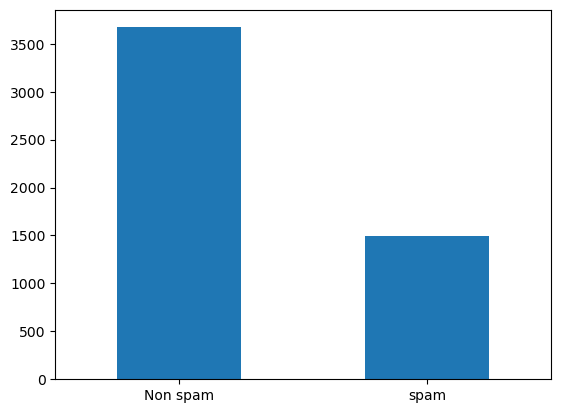

In [9]:
a = data['label_num'].value_counts()
a.plot(kind="bar")
plt.xticks(np.arange(2), ('Non spam', 'spam'),rotation=0)
plt.show()

In [15]:
X_train.shape

(3464, 4)

In [16]:
X_test.shape

(1707, 4)

In [9]:
print("Thus from this , we may conclude that the total number of spams out of all the emails is : ",(1500/5171)*100 ,"%")

Thus from this , we may conclude that the total number of spams out of all the emails is :  29.007928833881262 %
